 # 1.Реализовать генератор пользовательских данных для решения задачи подсчета количества клеток крови на изображениях клеток крови. 

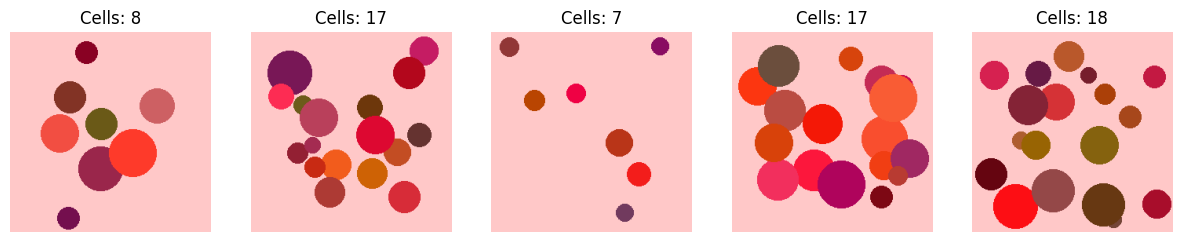

In [4]:
import numpy as np
import cv2
from PIL import Image, ImageDraw
import random
import os

# 1. Параметры генератора
IMAGE_SIZE = 256  # Размер изображения (квадратное)
CELL_COUNT_RANGE = (5, 20)  # Количество клеток на изображение (минимум, максимум)
CELL_SIZE_RANGE = (10, 30)  # Диаметр клеток (минимум, максимум)
CELL_COLOR_RANGE = ((100, 0, 0), (255, 100, 100))  # Цвет клеток (минимум, максимум по BGR)
BACKGROUND_COLOR = (267, 200, 200)  # Розовый фон
OVERLAP_PROBABILITY = 0.1  # Вероятность перекрытия клетки с другой

def random_color(color_range):
    """Генерирует случайный цвет в заданном диапазоне."""
    return tuple(random.randint(color_range[0][i], color_range[1][i]) for i in range(3))

def generate_blood_cell_image():
    """Генерирует одно изображение с клетками крови."""
    image = Image.new("RGB", (IMAGE_SIZE, IMAGE_SIZE), BACKGROUND_COLOR)
    draw = ImageDraw.Draw(image)
    cell_count = random.randint(CELL_COUNT_RANGE[0], CELL_COUNT_RANGE[1])
    cells = []  # Список координат и размеров клеток, чтобы отслеживать перекрытия

    for _ in range(cell_count):
        cell_size = random.randint(CELL_SIZE_RANGE[0], CELL_SIZE_RANGE[1])

        # Попробуем найти позицию для клетки, чтобы избежать перекрытия (если OVERLAP_PROBABILITY низкая)
        max_attempts = 100
        for attempt in range(max_attempts):
            x = random.randint(cell_size, IMAGE_SIZE - cell_size)
            y = random.randint(cell_size, IMAGE_SIZE - cell_size)

            # Проверяем, перекрывается ли новая клетка с существующими
            overlap = False
            if random.random() > OVERLAP_PROBABILITY: # Проверяем, нужно ли вообще проверять перекрытие
                for existing_x, existing_y, existing_size in cells:
                    distance = np.sqrt((x - existing_x)**2 + (y - existing_y)**2)
                    if distance < (cell_size + existing_size) * 0.7:  # Уменьшил коэфф. для допущения небольшого перекрытия
                        overlap = True
                        break

            if not overlap:
                break # Нашли подходящую позицию

        if overlap and attempt == max_attempts-1 :
            #Если не нашли хорошую позицию, то игнорируем данную клетку
            continue


        cell_color = random_color(CELL_COLOR_RANGE)
        draw.ellipse((x - cell_size, y - cell_size, x + cell_size, y + cell_size), fill=cell_color)
        cells.append((x, y, cell_size))

    return np.array(image), cell_count

def generate_dataset(num_images, output_dir="blood_cell_dataset"):
    """Генерирует набор данных изображений и меток."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    images = []
    labels = []

    for i in range(num_images):
        image, cell_count = generate_blood_cell_image()
        images.append(image)
        labels.append(cell_count)

        # Сохранение изображений (опционально)
        image_path = os.path.join(output_dir, f"image_{i}.png")
        cv2.imwrite(image_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Convert to BGR for OpenCV

    return images, labels

# 4. Создание набора данных
NUM_IMAGES = 100
images, labels = generate_dataset(NUM_IMAGES)

# 5. Визуализация
import matplotlib.pyplot as plt

def visualize_data(images, labels, num_samples=5):
    """Визуализирует несколько случайных изображений из набора данных."""
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        index = random.randint(0, len(images) - 1)
        axes[i].imshow(images[index])
        axes[i].set_title(f"Cells: {labels[index]}")
        axes[i].axis('off')
    plt.show()

visualize_data(images, labels)

# 2. Выполните "нарезку" изображений. Сохраните в отдельные папки изображения фона и изображения клеток крови.

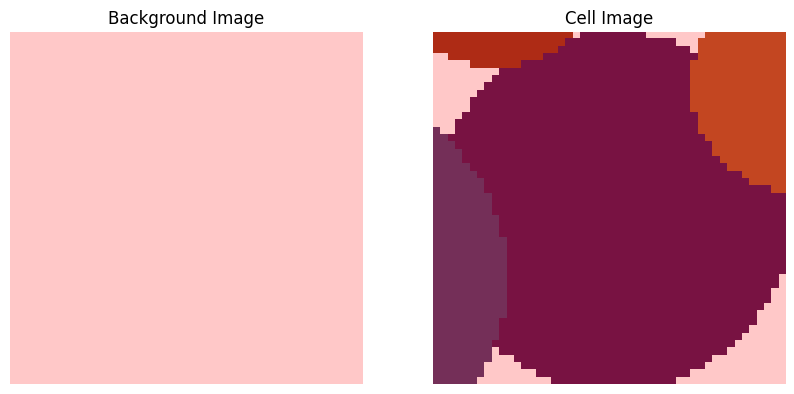

In [18]:
import numpy as np
import cv2
from PIL import Image, ImageDraw
import random
import os
# 1. Параметры генератора
IMAGE_SIZE = 256  # Размер изображения (квадратное)
CELL_COUNT_RANGE = (5, 20)  # Количество клеток на изображение (минимум, максимум)
CELL_SIZE_RANGE = (10, 30)  # Диаметр клеток (минимум, максимум)
CELL_COLOR_RANGE = ((100, 0, 0), (255, 100, 100))  # Цвет клеток (минимум, максимум по BGR)
BACKGROUND_COLOR = (267, 200, 200)  # Розовый фон
OVERLAP_PROBABILITY = 0.1  # Вероятность перекрытия клетки с другой
def random_color(color_range):
    """Генерирует случайный цвет в заданном диапазоне."""
    return tuple(random.randint(color_range[0][i], color_range[1][i]) for i in range(3))
def generate_blood_cell_image():
    """Генерирует одно изображение с клетками крови."""
    image = Image.new("RGB", (IMAGE_SIZE, IMAGE_SIZE), BACKGROUND_COLOR)
    draw = ImageDraw.Draw(image)
    cell_count = random.randint(CELL_COUNT_RANGE[0], CELL_COUNT_RANGE[1])
    cells = []  # Список координат и размеров клеток, чтобы отслеживать перекрытия
    for _ in range(cell_count):
        cell_size = random.randint(CELL_SIZE_RANGE[0], CELL_SIZE_RANGE[1])
        # Нахождение позиции для клетки, чтобы избежать перекрытия (если OVERLAP_PROBABILITY низкая)
        max_attempts = 100
        for attempt in range(max_attempts):
            x = random.randint(cell_size, IMAGE_SIZE - cell_size)
            y = random.randint(cell_size, IMAGE_SIZE - cell_size)
            # Проверяем, перекрывается ли новая клетка с существующими
            overlap = False
            if random.random() > OVERLAP_PROBABILITY: # Проверяем, нужно ли вообще проверять перекрытие
                for existing_x, existing_y, existing_size in cells:
                    distance = np.sqrt((x - existing_x)**2 + (y - existing_y)**2)
                    if distance < (cell_size + existing_size) * 0.7:  # Уменьшил коэфф. для допущения небольшого перекрытия
                        overlap = True
                        break
            if not overlap:
                break # Нашли подходящую позицию
        if overlap and attempt == max_attempts-1 :
            #Если не нашли хорошую позицию, то игнорируем данную клетку
            continue
        cell_color = random_color(CELL_COLOR_RANGE)
        draw.ellipse((x - cell_size, y - cell_size, x + cell_size, y + cell_size), fill=cell_color)
        cells.append((x, y, cell_size))
    return np.array(image), cells  # Возвращаем список координат и размеров клеток
def generate_dataset(num_images, output_dir="blood_cell_dataset"):
    """Генерирует набор данных изображений, меток и координат клеток."""
    background_dir = os.path.join(output_dir, "backgrounds")
    cells_dir = os.path.join(output_dir, "cells")
    if not os.path.exists(background_dir):
        os.makedirs(background_dir)
    if not os.path.exists(cells_dir):
        os.makedirs(cells_dir)
    images = []
    labels = []  # Список количества клеток на изображении
    cell_coordinates = []  # Список списков координат клеток для каждого изображения
    for i in range(num_images):
        image, cells = generate_blood_cell_image()
        images.append(image)
        labels.append(len(cells)) # Количество клеток в изображении
        cell_coordinates.append(cells)
        # Сохранение изображений фона
        background_image = Image.new("RGB", (IMAGE_SIZE, IMAGE_SIZE), BACKGROUND_COLOR) # чисто розовый фон
        background_image_path = os.path.join(background_dir, f"background_{i}.png")
        background_image.save(background_image_path)
        # Сохранение изображений клеток (вырезаем клетки и сохраняем)
        for j, (x, y, cell_size) in enumerate(cells):
            # Вырезаем клетку + небольшой отступ для контекста
            crop_size = int(cell_size * 2.5) # Размер вырезаемого квадрата, увеличил чтобы не обрезало
            x1 = max(0, x - cell_size)
            y1 = max(0, y - cell_size)
            x2 = min(IMAGE_SIZE, x + cell_size)
            y2 = min(IMAGE_SIZE, y + cell_size)
            cell_image = Image.fromarray(image[y1:y2, x1:x2])
            cell_image_path = os.path.join(cells_dir, f"image_{i}_cell_{j}.png")
            cell_image.save(cell_image_path)
    return images, labels, cell_coordinates
# 4. Создание набора данных
NUM_IMAGES = 2 # changed from 100 to 2 for demonstration
images, labels, cell_coordinates = generate_dataset(NUM_IMAGES)  # Теперь функция возвращает и координаты
# 5. Визуализация
import matplotlib.pyplot as plt
def visualize_data(images, labels, num_samples=5):
    """Визуализирует несколько случайных изображений из набора данных."""
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        index = random.randint(0, len(images) - 1)
        axes[i].imshow(images[index])
        axes[i].set_title(f"Cells: {labels[index]}")
        axes[i].axis('off')
    plt.show()


# Display the images
background_image_path = os.path.join("blood_cell_dataset", "backgrounds", f"background_0.png")
cell_image_path = os.path.join("blood_cell_dataset", "cells", f"image_0_cell_0.png")


background = Image.open(background_image_path)
cell = Image.open(cell_image_path)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(background)
plt.title("Background Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cell)
plt.title("Cell Image")
plt.axis("off")

plt.show()

# 2_2 2. Выполните "нарезку" изображений. Сохраните в отдельные папки изображения фона и изображения клеток крови

Обработано изображение: image_50.png


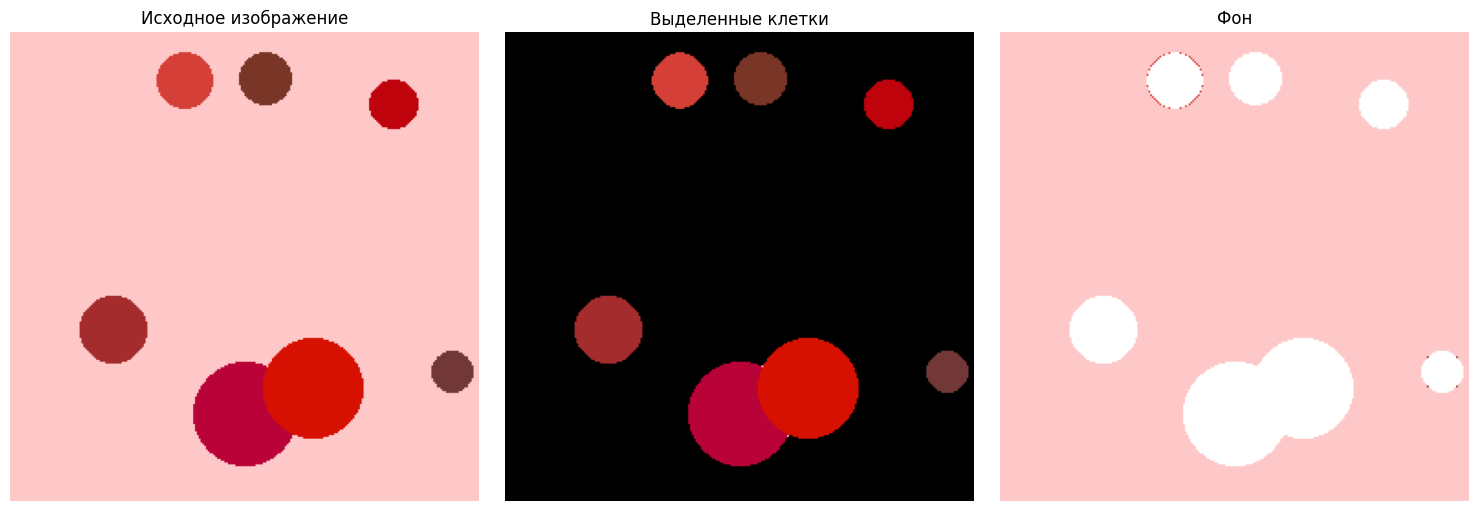

Обработано изображение: image_40.png
Обработано изображение: image_82.png
Обработано изображение: image_17.png
Обработано изображение: image_73.png
Обработано изображение: image_76.png
Обработано изображение: image_49.png
Обработано изображение: image_2.png
Обработано изображение: image_68.png
Обработано изображение: image_53.png
Обработано изображение: image_95.png
Обработано изображение: image_57.png
Обработано изображение: image_71.png
Обработано изображение: image_22.png
Обработано изображение: image_77.png
Обработано изображение: image_60.png
Обработано изображение: image_96.png
Обработано изображение: image_28.png
Обработано изображение: image_29.png
Обработано изображение: image_72.png
Обработано изображение: image_80.png
Обработано изображение: image_51.png
Обработано изображение: image_88.png
Обработано изображение: image_20.png
Обработано изображение: image_21.png
Обработано изображение: image_16.png
Обработано изображение: image_67.png
Обработано изображение: image_61.png
Об

In [29]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Путь к папке с изображениями клеток крови
input_dir = "blood_cell_dataset"  # Папка с актуальными картинками
# Папка для изображений с вырезанными клетками
output_cells_dir = "blood_cell_dataset_cells"
# Папка для изображений с вырезанным фоном (с белыми пятнами на месте клеток)
output_background_dir = "blood_cell_dataset_background"

# Создаем выходные папки, если они не существуют
os.makedirs(output_cells_dir, exist_ok=True)
os.makedirs(output_background_dir, exist_ok=True)

def process_image(image_path):
    """
    Обрабатывает изображение, выделяет клетки крови и сохраняет их и фон.
    """

    img = cv2.imread(image_path)

    if img is None:
        print(f"Ошибка: Не удалось прочитать изображение {image_path}")
        return None, None, None

    # 1. Предобработка изображения (улучшение контрастности, удаление шума)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Размытие для уменьшения шума
    # adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2) # Адаптивный порог

    # 2. Выделение клеток с помощью пороговой обработки (binary thresholding) или других методов.
    #    Здесь используется метод Оцу для автоматического определения порога.
    thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # 3. Морфологические операции для улучшения маски (закрытие дыр, удаление мелких объектов).
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)) # Создаем ядро эллиптической формы
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)  # Удаление мелких точек
    close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2) # Заполнение маленьких дыр
    # 4. Поиск контуров клеток.
    contours, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Создаем изображения для хранения результатов
    cells_image = np.zeros_like(img)
    background_image = img.copy()

    # 5. Перебор найденных контуров и обработка каждой клетки.
    for i, contour in enumerate(contours):
        # Получаем ограничивающий прямоугольник для каждой клетки.
        x, y, w, h = cv2.boundingRect(contour)

        # Извлекаем клетку из исходного изображения.
        cell = img[y:y+h, x:x+w]

        # Создаем маску для выделенной клетки
        mask = np.zeros_like(img, dtype=np.uint8)
        cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

        # Извлекаем клетку, используя маску
        masked_cell = cv2.bitwise_and(img, img, mask=mask[:,:,0])

        # Помещаем выделенную клетку на новое изображение
        cells_image = cv2.bitwise_or(cells_image, masked_cell)

        # Заменяем клетку белым цветом на фоне
        cv2.drawContours(background_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED) # fillPoly не работает с контуром, drawContours делает то же самое.

    # 6. Сохраняем изображения с выделенными клетками и фоном.
    base_filename = os.path.basename(image_path)  # Извлекаем имя файла (без пути)
    filename_without_extension, _ = os.path.splitext(base_filename) # удаляем расширение файла

    cells_filename = f"{filename_without_extension}_cells.png"
    background_filename = f"{filename_without_extension}_background.png"

    cells_path = os.path.join(output_cells_dir, cells_filename)
    background_path = os.path.join(output_background_dir, background_filename)

    cv2.imwrite(cells_path, cells_image)
    cv2.imwrite(background_path, background_image)

    return img, cells_image, background_image # Возвращаем изображения для визуализации



# 7. Обрабатываем все изображения в папке и визуализируем первое
first_image_processed = False
for filename in os.listdir(input_dir):
    if filename.endswith((".jpg", ".jpeg", ".png")):  # Обрабатываем только изображения
        image_path = os.path.join(input_dir, filename)
        original_img, cells_img, background_img = process_image(image_path)
        print(f"Обработано изображение: {filename}")

        if not first_image_processed:
            # Визуализация с помощью Matplotlib
            if original_img is not None and cells_img is not None and background_img is not None:
                plt.figure(figsize=(15, 5))

                plt.subplot(1, 3, 1)
                plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
                plt.title("Исходное изображение")
                plt.axis('off') # Отключаем оси координат

                plt.subplot(1, 3, 2)
                plt.imshow(cv2.cvtColor(cells_img, cv2.COLOR_BGR2RGB))
                plt.title("Выделенные клетки")
                plt.axis('off')

                plt.subplot(1, 3, 3)
                plt.imshow(cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB))
                plt.title("Фон")
                plt.axis('off')

                plt.tight_layout() # Для автоматической настройки расположения subplot'ов
                plt.show()
                first_image_processed = True

print("Обработка завершена.")

# blending-задачи